## Assignment-1B: Naive Bayes Classifier

In [442]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt

In [443]:
Words = set()
cl = ['1','0']

# Reading the text file
f = open('input.txt', 'r')

# Features
for i, line in enumerate(f):
    for word in line.split():
      Words.add(re.sub(r'[^\w\s]', '',word))
n = i+1 # Number of rows         
f.close()

# Dataset
df = pd.DataFrame(0,index=range(n),columns = Words)
# Class values 
y = pd.DataFrame(0,index=range(n),columns = cl) 

f = open('input.txt', 'r')
for i, line in enumerate(f):
 for word in line.split():
  w = re.sub(r'[^\w\s]', '',word) 
  df.at[i,w] += 1
 y.at[i,w] = 1
 df.at[i,w] -= 1
f.close()

# Target variable
target= np.array(y['1'])

In [444]:
df.drop(columns =['', 'a', 'an', 'the', 'be'], axis = 1,inplace=True)
print(df.head())
y.rename(columns={'1': 'spam', '0': 'not spam'},inplace = True)
print(y.head())

   incredibly  Happy  forget  nearly  ...  glued  accept  infuriating  Angeles
0           0      0       0       0  ...      0       0            0        0
1           0      0       0       0  ...      0       0            0        0
2           0      0       0       0  ...      0       0            0        0
3           0      0       0       0  ...      0       0            0        0
4           0      0       0       0  ...      0       0            0        0

[5 rows x 2217 columns]
   spam  not spam
0     0         1
1     1         0
2     1         0
3     0         1
4     1         0


In [445]:
# Class prior probability 
n_spam = (y['spam'] == 1).sum()
n_notspam = (y['not spam'] == 1).sum()
prob_spam = n_spam/n
prob_notspam = 1 - prob_spam

In [446]:
# Probabilities of predicting each class for a given row
def predict(psw,x,prob_spam):
  prob = (np.prod(np.multiply(psw,x)))*prob_spam # * Class Prior Probability
  if prob > 0.5:
   return 1 # Spam
  else:
    return 0 # Not Spam

In [447]:
data= np.array(df)

# Features (numpy)
X = data
d = X.shape[1] # No of features
m = n
testsize = int(n/7) # For 7fold

# Output y/ Target
y_spam = np.array(y['spam'])
y_notspam = np.array(y['not spam'])

y = y_spam

accuracies=[]
model=1

# Calculate accuracy for each fold (Runs 7 times)
for index in range(0, m, testsize):
  ts = testsize
  if index + testsize > m:
    break
  X_train= np.concatenate((X[:m-index-ts,:],X[m-index:,:]),axis =0)
  X_test= X[m-index-ts: m-index,:]
  y_train= np.concatenate((y[:m-index-ts],y[m-index:]),axis =0)
  y_train= y_train.reshape(len(y_train),1)
  y_test= y[m-index-ts:m-index]
 
	# Posterior Probability (row vector)
  prob_spam_word = np.zeros((1,d))
  
  Num = ((np.sum((X_train* y_train),axis = 0))/n_spam) # Likelihood 
  Den = ((np.sum((X_train* (1- y_train)),axis = 0))/n_spam)*prob_notspam + Num*prob_spam # Predictor Prior Probability
  for i in range(d):
    prob_spam_word[0, i] = (Num[i] +1)/ (Den[i]+d) # Laplace smoothing
 


 
  correct=0
  
  # Testing
  for i in range(len(X_test)):
	  y_pred = predict(prob_spam_word,X_test[i],prob_spam)
	  y_true = y_test[i]
	  if y_pred==y_true:
		  correct+=1

  accuracy=correct/len(X_test)*100
  print("Accuracy using Fold {0} is {1}%".format(model,round(accuracy,2)))
  accuracies.append(accuracy)
  model+=1

accuracies= np.array(accuracies)
print("Average accuracy with K-Fold cross validation is {0} %".format(round(np.mean(accuracies),2)))


Accuracy using Fold 1 is 53.52%
Accuracy using Fold 2 is 50.0%
Accuracy using Fold 3 is 54.93%
Accuracy using Fold 4 is 50.7%
Accuracy using Fold 5 is 45.77%
Accuracy using Fold 6 is 47.89%
Accuracy using Fold 7 is 47.18%
Average accuracy with K-Fold cross validation is 50.0 %


## Logistic regression algorithm for the binary classification for Comparison

In [448]:
def sigmoid(x):
	return 1.0/(1+np.exp(-x))

def log_loss(y,y_hat):
	l= -y*np.log(y_hat)
	l-=(1-y)*np.log(1-y_hat)
	return l

def predict(w,x):
	z= x.dot(w.T)
	y_hat= sigmoid(z)
	y_hat= list(y_hat)
	return y_hat.index(max(y_hat))

Accuracy using Fold 1 is 59.86%
Accuracy using Fold 2 is 66.2%
Accuracy using Fold 3 is 61.97%
Accuracy using Fold 4 is 64.79%
Accuracy using Fold 5 is 57.75%
Accuracy using Fold 6 is 64.79%
Accuracy using Fold 7 is 59.15%
Average accuracy with K-Fold cross validation is 62.07 %


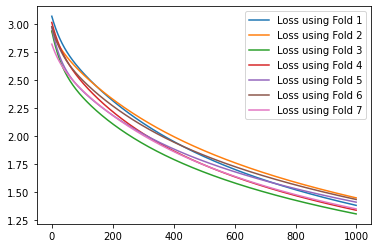

In [449]:
epochs=1000
lr=0.1

# Features
data= np.array(df)
X= data
bias= np.ones((X.shape[0],1))
testsize =int(n/7)
X= np.hstack((X,bias))
# Output y
y_temp=target

# Classes
classes = np.unique(np.array(target), axis=0).size
# Expand y
y=[[1 if i==c else 0 for i in range(classes)]for c in y_temp]
y=np.array(y)


weights=[]
accuracies=[]

model=1

# Find weight and calculate accuracy for each fold (Runs 7 times)
for index in range(0, m, testsize):
  ts = testsize
  if index + testsize > m:
    break
  X_train= np.concatenate((X[:m-index-ts,:],X[m-index:,:]),axis =0)
  X_test= X[m-index-ts: m-index,:]
  y_train= np.concatenate((y[:m-index-ts],y[m-index:]),axis =0)
  y_test= y[m-index-ts:m-index]
	

  w= np.random.randn(classes,X.shape[1])
  losses=[]


  for _ in range(epochs):
	  z= X_train.dot(w.T)
	  y_hat= sigmoid(z)
	  loss= log_loss(y_train,y_hat)
	  epoch_loss= np.sum(loss)/y_train.shape[0]
	  losses.append(epoch_loss)
	  temp= y_hat-y_train
	  loss_der= temp.T.dot(X_train)/X_train.shape[0]
	  w-=lr*loss_der


  plt.plot(losses,label="Loss using Fold {0}".format(model))


  correct=0
  # Testing
  for i in range(len(X_test)):
	  y_pred= predict(w,X_test[i])
	  y_t=list(y_test[i])
	  y_true= y_t.index(max(y_t))
	  if y_pred==y_true:
		  correct+=1

  accuracy=correct/len(X_test)*100
  print("Accuracy using Fold {0} is {1}%".format(model,round(accuracy,2)))
  accuracies.append(accuracy)
  weights.append(w)
  model+=1

accuracies= np.array(accuracies)
print("Average accuracy with K-Fold cross validation is {0} %".format(round(np.mean(accuracies),2)))

plt.legend(loc="upper right")
plt.show()